#         Bike Sharing Assignment - Multiple Regression Problem



##Problem statement and Business Goal

**Problem Statement**  
BoomBikes allows individuals to borrow bikes on a short-term basis. Recently, BoomBikes, a US bike-sharing provider, has faced significant revenue declines due to the COVID-19 pandemic and seeks to develop a business plan to recover post-lockdown.

To prepare for a potential increase in demand for shared bikes as the situation improves, BoomBikes is working with a consulting firm to identify the key factors affecting bike demand. They aim to determine which variables significantly predict bike usage and how well these variables describe demand patterns.

**Business Goal:**  
1. Model the demand for shared bikes using available independent variables to help management adjust strategies and meet customer expectations effectively.
2. The model will also aid in understanding demand dynamics for future growth.


# Step 1 - Read data

In [864]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



df_bike_sharing = pd.read_csv('/content/day.csv')
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2 - Understand Data

In [865]:
# describe the data frame
df_bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [866]:
# get data types
df_bike_sharing.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [867]:
#check the shape of data frame
df_bike_sharing.shape

(730, 16)

# Step 3 Data cleaning

## Handle Missing values

In [868]:
# check if any null values exists
df_bike_sharing.isnull().sum()

# Inference 1:
# No null values are present so no additional steps to handle missing values

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [869]:
# check for duplicate records
df_bike_sharing.duplicated().sum()

# Inference 2
# since zero duplicates found so total duplicate rows is 0 and thus no redundant entries

0

## Dataset characteristics

Following fields describe the data:

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# Step 4 - Exploratory Data Analysis

## Visualize data

<Figure size 1000x600 with 0 Axes>

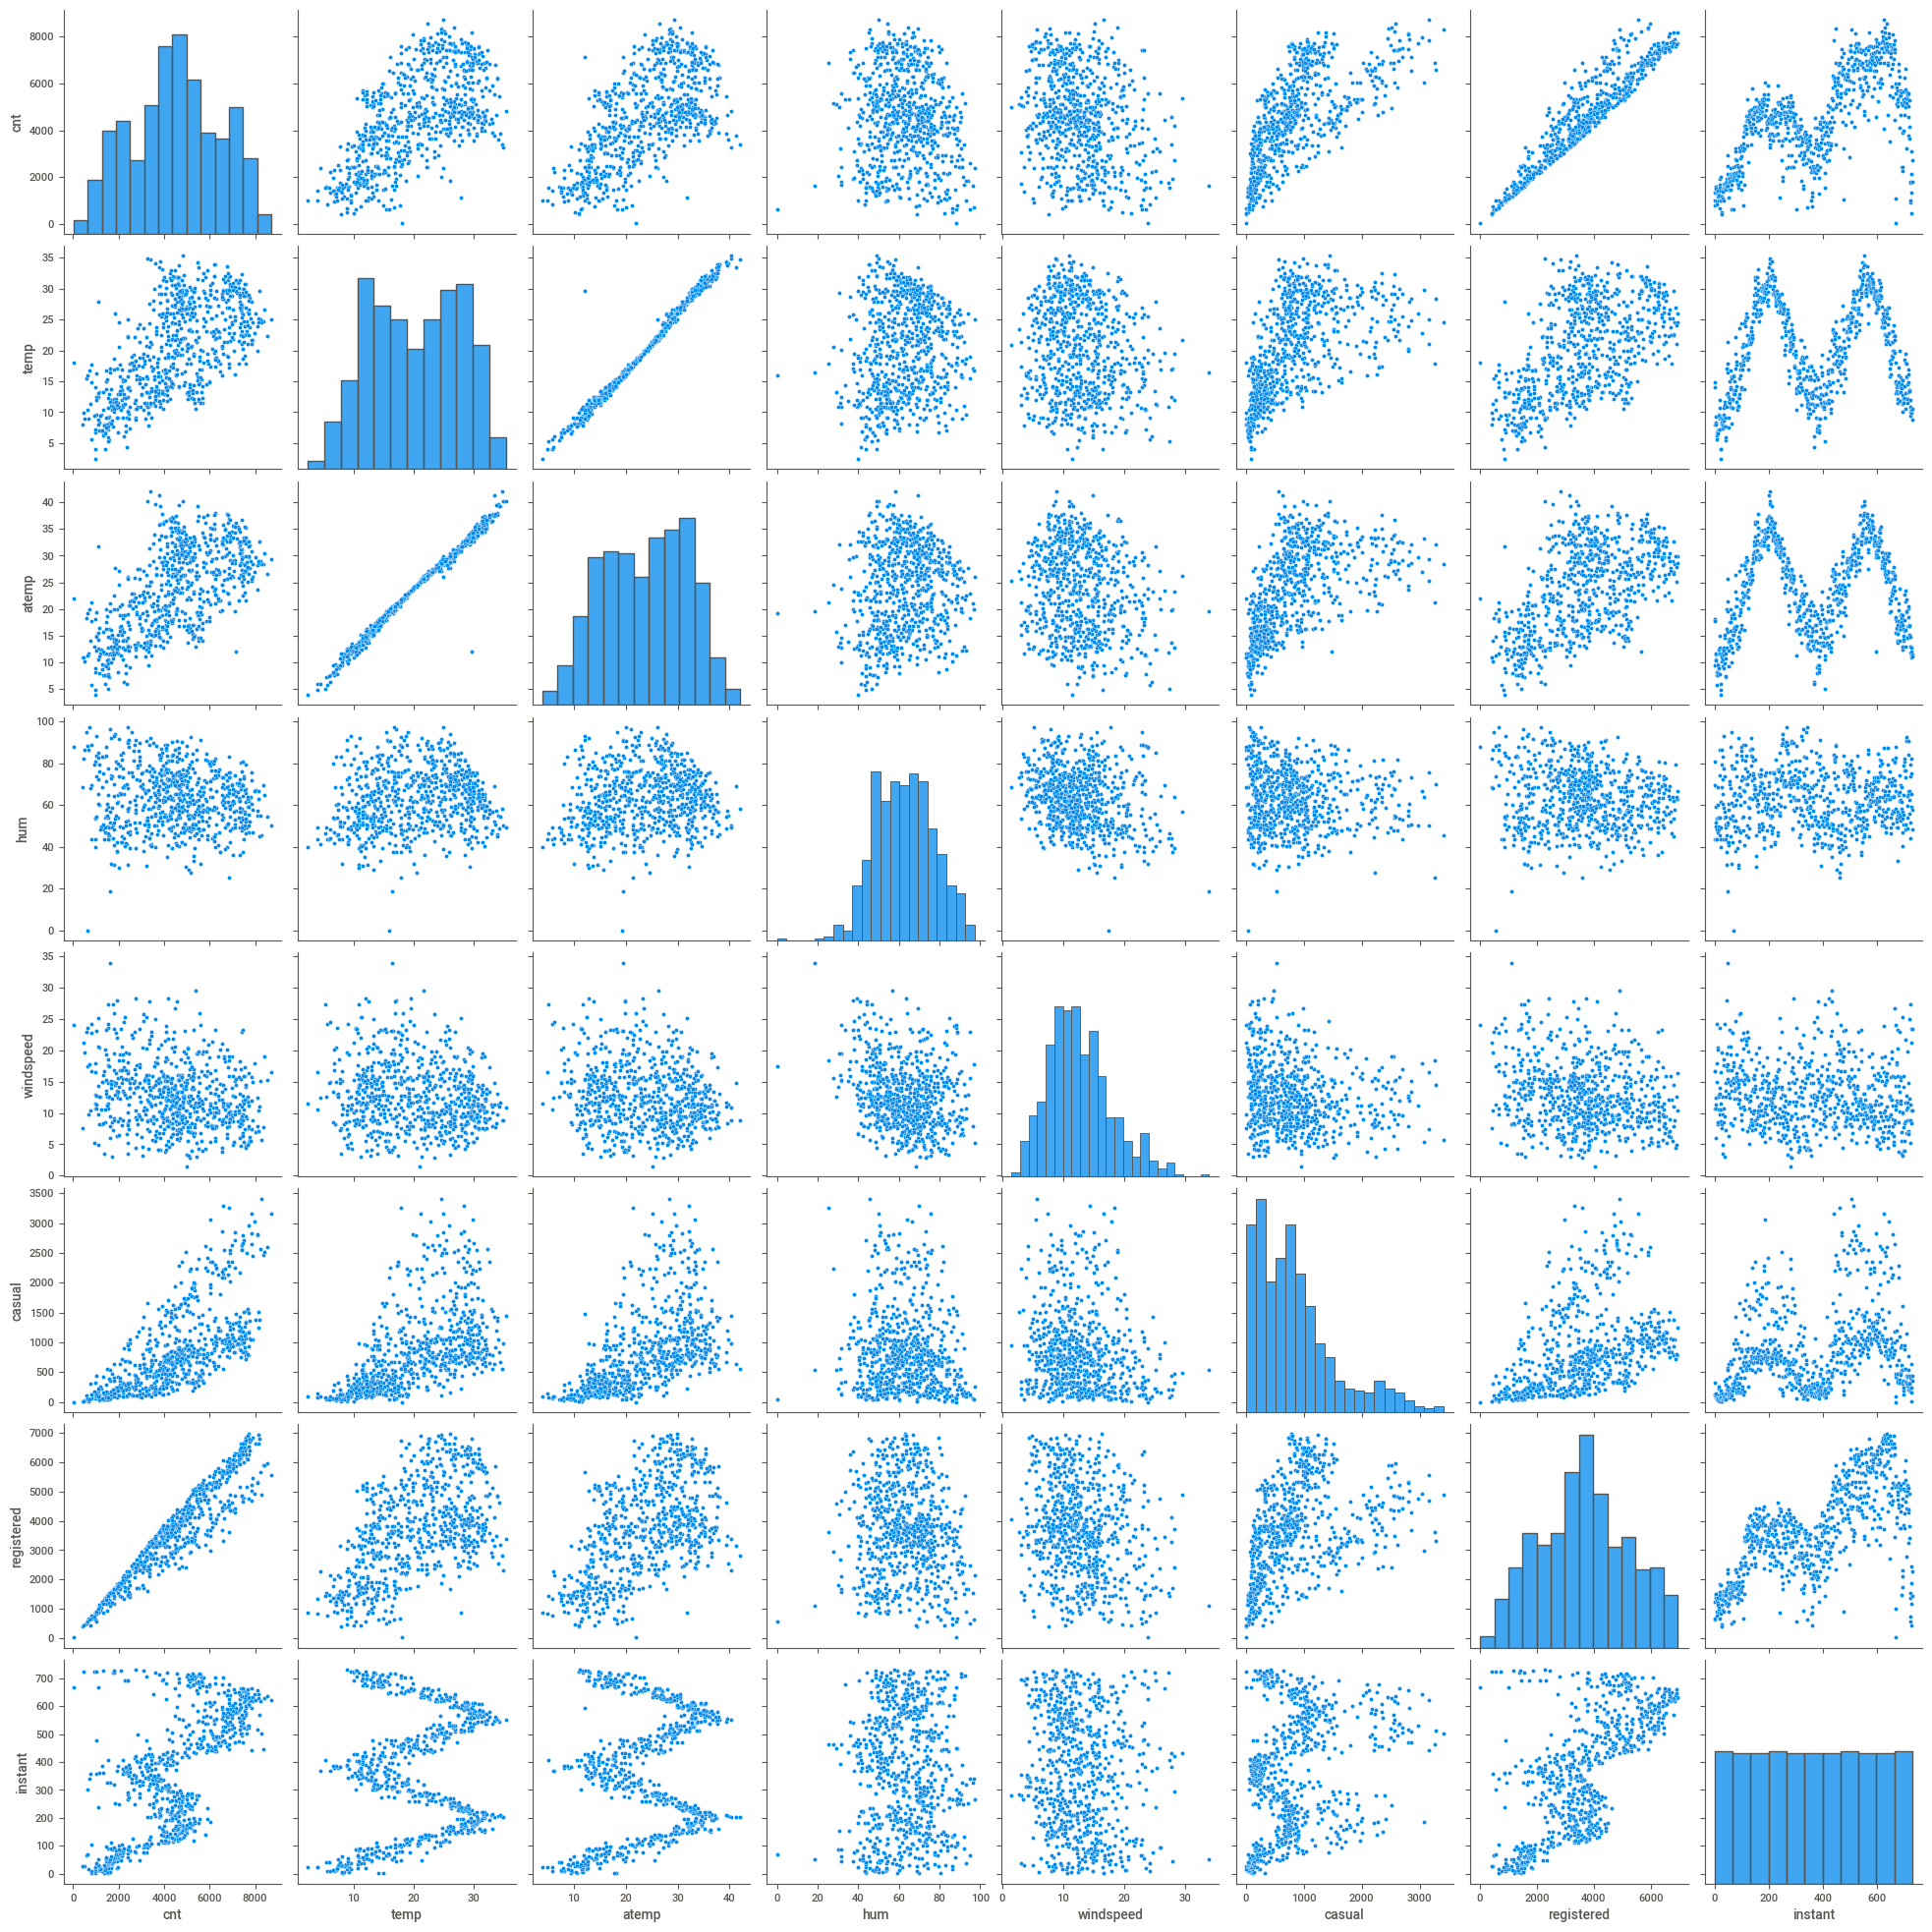

In [870]:
# identify categorical variables
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
# identify numerical variables
num_cols = ['cnt', 'temp', 'atemp', 'hum','windspeed', 'casual', 'registered', 'instant']
plt.figure(figsize=(10, 6))
sns.pairplot(df_bike_sharing[num_cols])
plt.show()

In [871]:
# Inference 3:

# Data dictionary says that cnt is total bikes including both casual and registered
# Target Variable - cnt
# Remove from data - registered, casual
# drop instant as it is only index column
# dteday is date and since year and month are already given, same can be removed(will again bring in if required).
# Distributin of temp and atemp appears to be similar, will find correlation and decide on dropping it

df_bike_sharing = df_bike_sharing.drop(['casual', 'registered', 'instant', 'dteday'], axis=1)
num_cols.remove('casual')
num_cols.remove('registered')
num_cols.remove('instant')

df_bike_sharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


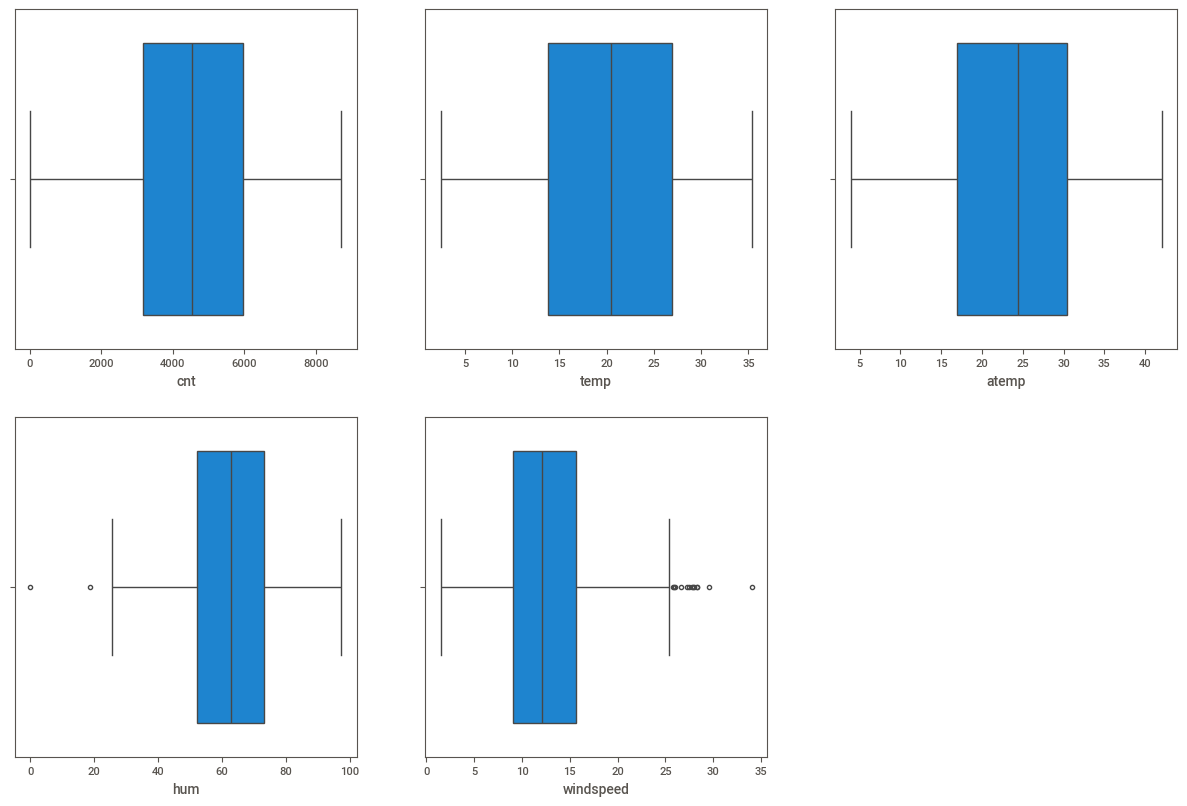

In [872]:
# identify numerical variables and draw box plots
plt.figure(figsize=(15, 15))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df_bike_sharing, x=i[1])

# Inference 4:
# Windspeed contains outliers. this could be used to improve model performance later.

In [873]:
df_bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Data Prepartion

In [874]:
# Data dictionary mentions Categorical data columns as season, weathersit, mnth, weekday so replacing with appropriate mapped values
df_bike_sharing['season'] = df_bike_sharing['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df_bike_sharing['season'].value_counts()

,count
season,
fall,188
summer,184
spring,180
winter,178


In [875]:
df_bike_sharing['weathersit'] = df_bike_sharing['weathersit'].map({1:'clear',2:'mist_cloudy',3:'light_snow',4:'heavy_rain'})
df_bike_sharing['weathersit'].value_counts()

,count
weathersit,
clear,463
mist_cloudy,246
light_snow,21


In [876]:
df_bike_sharing['mnth'] = df_bike_sharing['mnth'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df_bike_sharing['mnth'].value_counts()

,count
mnth,
jan,62
mar,62
may,62
jul,62
aug,62
oct,62
dec,62
apr,60
jun,60


In [877]:
df_bike_sharing['weekday'] = df_bike_sharing['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df_bike_sharing['weekday'].value_counts()

,count
weekday,
sat,105
sun,105
mon,105
tue,104
thu,104
fri,104
wed,103


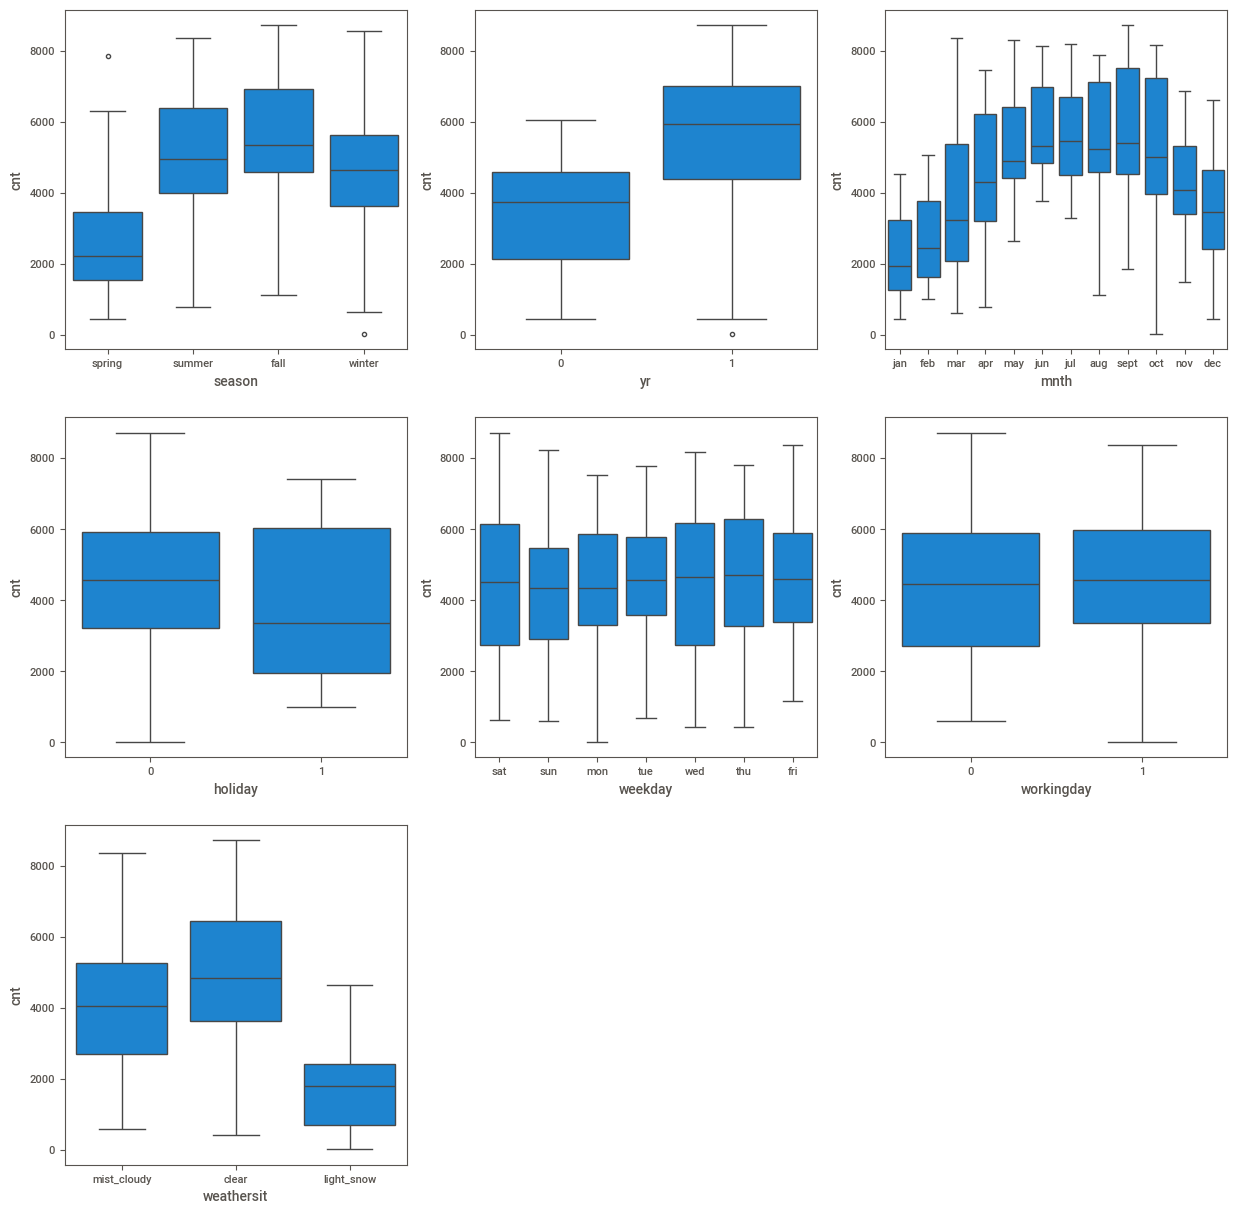

In [878]:
# Boxplot for categorical variables with target variable
plt.figure(figsize=(15, 15))
counter = 1
for i in cat_cols:
    plt.subplot(3,3,counter)
    sns.boxplot(data=df_bike_sharing, x=i, y='cnt')
    counter = counter + 1
plt.show()

# Inference
# 1. 'Fall' season has highest demand for rental bikes.
# 2. Demand for next year has grown.
# 3. Demand is continuously growing each month till June.
# 4. September month has highest demand. After September, demand is decreasing.
# 5. Weekday is not giving a clear picture about demand.
# 6. The 'clear' weather situation has highest demand.
# 7. During the end and beginning of year, demand is less.

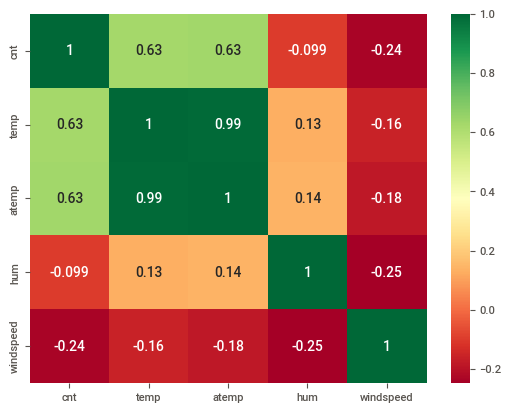

In [879]:
# corr between numerical columns
corr_values = df_bike_sharing[num_cols].corr()
#Draw Heatmap of correlation
sns.heatmap(corr_values,annot=True, cmap='RdYlGn' )
plt.show()

# Inference:-
# 1. we see that temp , atemp have high positive correlation with cnt
# 2. humidity has high negative correlation with cnt
# 3. windspeed has weak negative correlation with cnt
# 4. temp , atemp have high positive correlation, one of them can be dropped.

In [880]:
# considering temp for removal
num_cols.remove('temp')
df_bike_sharing = df_bike_sharing.drop(['temp'], axis=1)
df_bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Create Dummies

In [881]:
# Four categorical columns - season, mnth, weekday, weathersit, have more than 2 categories so need to have dummies.
df_bike_sharing.season.value_counts()
dum_season = pd.get_dummies( df_bike_sharing['season'], drop_first=True).astype(int)
dum_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [882]:
dum_mnth = pd.get_dummies(df_bike_sharing['mnth'], drop_first=True).astype(int)
dum_mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [883]:
dum_weekday = pd.get_dummies(df_bike_sharing['weekday'], drop_first=True).astype(int)
dum_weekday.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [884]:
dum_weathersit = pd.get_dummies(df_bike_sharing['weathersit'], drop_first=True).astype(int)
dum_weathersit.head()

,light_snow,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [885]:
# Replace original columns with dummies

# Append the dummy to original data frame
df_bike_sharing = pd.concat([df_bike_sharing,dum_season ,dum_mnth, dum_weekday, dum_weathersit], axis=1)

# Remove the four columsn from which dummies were created
df_bike_sharing.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
df_bike_sharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,light_snow,mist_cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [886]:
# # Windspeed contains outliers. removing them could be used to improve model performance later.
# # Define a function to remove outliers based on IQR
# def remove_outliers(data, columns):
#     # for col in columns:
#   Q1 = data[columns].quantile(0.25)
#   Q3 = data[columns].quantile(0.75)
#   IQR = Q3 - Q1
# # Data is less so removing extreme outliers only
#   lower_bound = Q1 - (IQR * 2)
#   upper_bound = Q3 + (IQR * 2)
#   data = data[(data[columns] >= lower_bound) & (data[columns] <= upper_bound)]
#   return data

# # Outliers can be removed this way but considering Actuals for analysis.
# df_bike_sharing = remove_outliers(df_bike_sharing, "windspeed")

# Step 5 - Train and Test data split

In [887]:
df_train, df_test = train_test_split(df_bike_sharing, train_size=0.7, test_size=0.3, random_state=42)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [888]:
#categorical dummy columns dont need scaling
independent_num_cols= ['atemp', 'hum', 'windspeed']
dependent_num_cols = ['cnt']
scaler = MinMaxScaler()
# Training data set requires both fit\learn and transform
df_train[independent_num_cols] = scaler.fit_transform(df_train[independent_num_cols])

df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,light_snow,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.526680,0.653801,0.414566,4557.639216,0.231373,0.256863,0.250980,...,0.090196,0.090196,0.149020,0.150980,0.152941,0.147059,0.131373,0.139216,0.029412,0.345098
std,0.500025,0.163554,0.471169,0.213153,0.143542,0.185671,1937.436761,0.422124,0.437332,0.434003,...,0.286744,0.286744,0.356457,0.358381,0.360284,0.354512,0.338139,0.346511,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352585,0.544033,0.281934,3296.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.564951,0.659296,0.383964,4591.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.698389,0.756762,0.525698,6039.250000,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [889]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'light_snow', 'mist_cloudy'],
      dtype='object')

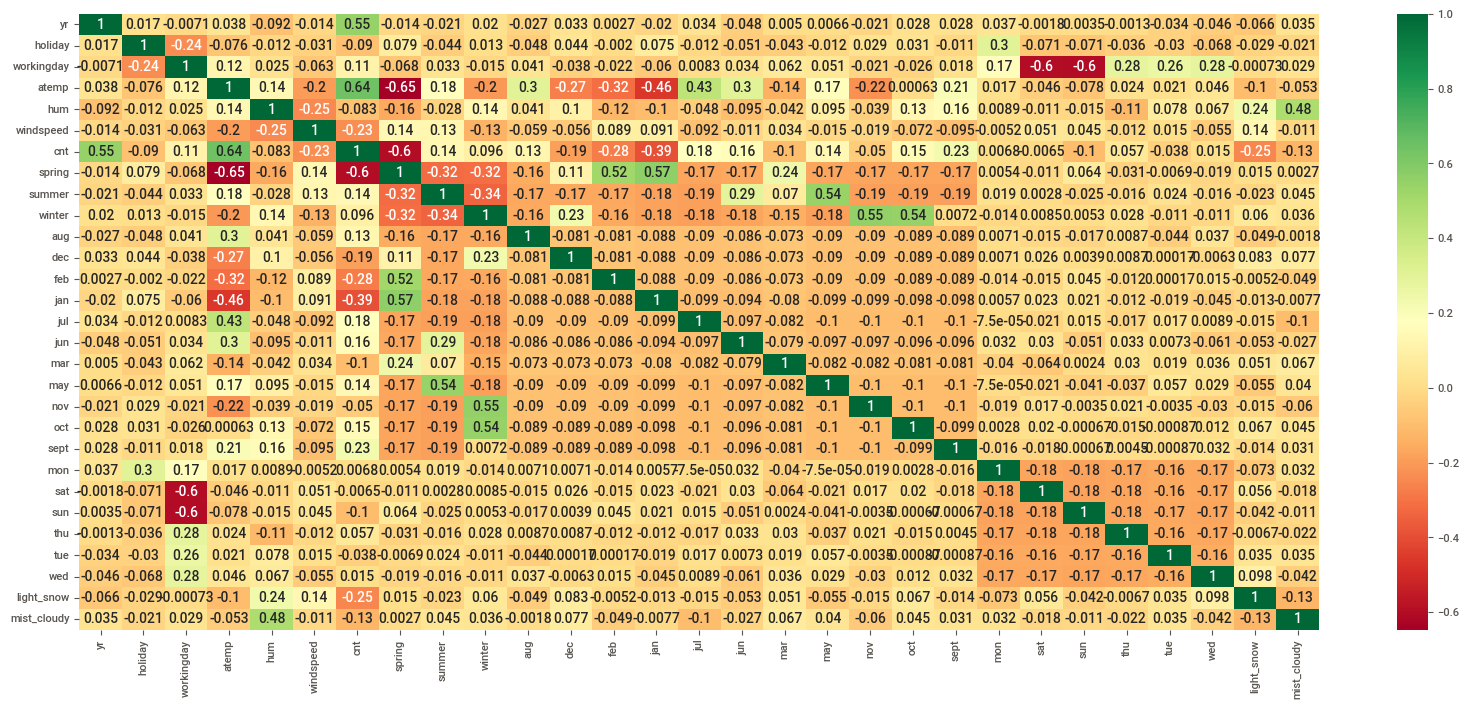

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'light_snow', 'mist_cloudy'],
      dtype='object')

In [890]:
plt.figure(figsize=(20,8))
sns.heatmap(df_train.corr(), cmap='RdYlGn', annot=True)
plt.show()
df_train.columns

In [891]:
# get X_train and y_train from training data
y_train = df_train.pop('cnt')
X_train = df_train
X_train.shape

(510, 28)

# Step 6 - Feature selection

## Hybrid approach - Automated(RFE) + Manual feature selection

In [892]:
#Perform analysis with all columns
lr = LinearRegression()

# add constant
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

# Inference
# We can notice p-values greater than 0.05 and Adj R square to be 83.9, we have to eliminate high p-value features

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.23
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.76e-178
Time:                        18:15:14   Log-Likelihood:                -4103.8
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     482   BIC:                             8382.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2347.0932    327.923      7.157      0.000    1702.758    2991.429
yr           1954.6351     70.761     27.623      0.000    1815.597    2093.673
holiday       252.1292    205.596      1.226      0.221    -151.847     656.105
workingday    853.6527    114.121      7.480      0.000     629.417    1077.888
atemp        3824.3967    412.640      9.268      0.000    3013.600    4635.193
hum         -1366.6245    342.632     -3.989      0.000   -2039.862    -693.387
windspeed    -888.0877    207.774     -4.274      0.000   -1296.343    -479.832
spring      -1219.8591    270.035     -4.517      0.000   -1750.450    -689.269
summer         83.5630    224.724      0.372      0.710    -357.997     525.123
winter        635.0759    229.673      2.765      0.006     183.791    1086.360
aug           -28.9007    293.402     -0.099      0.922    -605.406     547.604
dec          -329.7699    301.489     -1.094      0.275    -922.166     262.626
feb           131.3397    306.105      0.429      0.668    -470.125     732.804
jan             9.2721    311.777      0.030      0.976    -603.337     621.881
jul          -299.9597    296.140     -1.013      0.312    -881.844     281.925
jun            66.8665    205.025      0.326      0.744    -335.986     469.719
mar           462.7847    240.240      1.926      0.055      -9.263     934.833
may           287.3085    175.189      1.640      0.102     -56.921     631.538
nov          -430.6669    319.546     -1.348      0.178   -1058.542     197.208
oct           320.9371    314.453      1.021      0.308    -296.931     938.805
sept          659.0343    274.345      2.402      0.017     119.975    1198.094
mon          -168.6825    134.506     -1.254      0.210    -432.973      95.608
sat           815.8552    120.691      6.760      0.000     578.711    1053.000
sun           425.4560    123.533      3.444      0.001     182.727     668.185
thu           -54.9382    132.559     -0.414      0.679    -315.403     205.526
tue          -224.1804    135.927     -1.649      0.100    -491.264      42.903
wed           -64.1743    134.707     -0.476      0.634    -328.861     200.512
light_snow  -1864.9249    236.425     -7.888      0.000   -2329.475   -1400.375
mist_cloudy  -480.1170     92.217     -5.206      0.000    -661.314    -298.920
==============================================================================
Omnibus:                       86.680   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.508
Skew:                          -0.877   Prob(JB):                     8.72e-46
Kurtosis:                       5.587   Cond. No.                     1.36e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covar

## Automated elimination

In [893]:
# X_train - 28 Independent variables exists, select auto feature selection
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, n_features_to_select = 14)
rfe.fit(X_train, y_train)
feature_analysis = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Display the results
for feature, selected, rank in feature_analysis:
    print(f"Feature: {feature}, Selected: {selected}, Rank: {rank}")


Feature: yr, Selected: True, Rank: 1
Feature: holiday, Selected: False, Rank: 3
Feature: workingday, Selected: False, Rank: 2
Feature: atemp, Selected: True, Rank: 1
Feature: hum, Selected: True, Rank: 1
Feature: windspeed, Selected: True, Rank: 1
Feature: spring, Selected: True, Rank: 1
Feature: summer, Selected: False, Rank: 9
Feature: winter, Selected: True, Rank: 1
Feature: aug, Selected: False, Rank: 14
Feature: dec, Selected: True, Rank: 1
Feature: feb, Selected: False, Rank: 10
Feature: jan, Selected: False, Rank: 15
Feature: jul, Selected: True, Rank: 1
Feature: jun, Selected: False, Rank: 11
Feature: mar, Selected: True, Rank: 1
Feature: may, Selected: False, Rank: 4
Feature: nov, Selected: True, Rank: 1
Feature: oct, Selected: False, Rank: 5
Feature: sept, Selected: True, Rank: 1
Feature: mon, Selected: False, Rank: 8
Feature: sat, Selected: True, Rank: 1
Feature: sun, Selected: False, Rank: 7
Feature: thu, Selected: False, Rank: 13
Feature: tue, Selected: False, Rank: 6
Feat

In [894]:
#select relevant RFE columns and check summary
rfe_cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_cols]
# add constant
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

# We can notice p-values for holiday	> 0.05 and Adj R square increased from 83.9, have to check with VIF now.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.67e-185
Time:                        18:15:14   Log-Likelihood:                -4118.8
No. Observations:                 510   AIC:                             8268.
Df Residuals:                     495   BIC:                             8331.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3162.3333    306.080     10.332      0.000    2560.957    3763.710
yr           1959.7074     71.137     27.548      0.000    1819.939    2099.476
atemp        3903.2130    310.623     12.566      0.000    3292.911    4513.515
hum         -1386.9849    334.405     -4.148      0.000   -2044.013    -729.957
windspeed    -930.0279    208.218     -4.467      0.000   -1339.127    -520.929
spring      -1312.1709    141.891     -9.248      0.000   -1590.953   -1033.389
winter        738.5197    119.399      6.185      0.000     503.928     973.111
dec          -533.0321    150.984     -3.530      0.000    -829.681    -236.383
jul          -488.5388    140.686     -3.473      0.001    -764.954    -212.124
mar           424.8886    151.854      2.798      0.005     126.530     723.247
nov          -689.4885    158.808     -4.342      0.000   -1001.509    -377.468
sept          465.3490    129.986      3.580      0.000     209.957     720.741
sat           143.9937     98.433      1.463      0.144     -49.404     337.391
light_snow  -1807.4638    236.589     -7.640      0.000   -2272.306   -1342.622
mist_cloudy  -466.1726     92.441     -5.043      0.000    -647.799    -284.547
==============================================================================
Omnibus:                       87.332   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.675
Skew:                          -0.923   Prob(JB):                     1.77e-41
Kurtosis:                       5.330   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [895]:
# calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# check for VIF < 5 for features selection

,Features,VIF
2,hum,25.01
1,atemp,17.45
3,windspeed,5.04
4,spring,2.74
5,winter,2.72
13,mist_cloudy,2.24
0,yr,2.09
9,nov,1.84
7,jul,1.48
6,dec,1.37


## Manual Elimination

In [896]:
# Drop hum as it has a negative correlation with target variable.
# p-value as less than 0.05 and removing highest VIF feature - hum
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.35e-183
Time:                        18:15:15   Log-Likelihood:                -4127.5
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     496   BIC:                             8342.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2370.3289    243.086      9.751      0.000    1892.723    2847.935
yr           2000.6748     71.590     27.946      0.000    1860.018    2141.332
atemp        3659.6497    309.964     11.807      0.000    3050.646    4268.653
windspeed    -684.4252    202.854     -3.374      0.001   -1082.985    -285.866
spring      -1347.2701    143.933     -9.360      0.000   -1630.063   -1064.477
winter        688.6493    120.717      5.705      0.000     451.470     925.829
dec          -574.7576    153.090     -3.754      0.000    -875.542    -273.974
jul          -436.5230    142.396     -3.066      0.002    -716.297    -156.749
mar           463.6694    154.022      3.010      0.003     161.054     766.285
nov          -692.4666    161.379     -4.291      0.000   -1009.537    -375.396
sept          411.9633    131.443      3.134      0.002     153.710     670.216
sat           145.5610    100.027      1.455      0.146     -50.968     342.090
light_snow  -2217.3082    218.448    -10.150      0.000   -2646.506   -1788.111
mist_cloudy  -687.2326     76.753     -8.954      0.000    -838.035    -536.431
==============================================================================
Omnibus:                       83.846   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.685
Skew:                          -0.890   Prob(JB):                     9.59e-40
Kurtosis:                       5.300   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [897]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.36
2,windspeed,4.99
4,winter,2.38
0,yr,2.09
3,spring,1.79
8,nov,1.79
12,mist_cloudy,1.57
6,jul,1.43
5,dec,1.33
9,sept,1.23


In [898]:
# Drop sat as p value is >.05
X_train_rfe = X_train_rfe.drop(['sat'], axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.05e-183
Time:                        18:15:15   Log-Likelihood:                -4128.6
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     497   BIC:                             8338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2407.1238    242.039      9.945      0.000    1931.577    2882.670
yr           2001.3503     71.669     27.925      0.000    1860.539    2142.161
atemp        3633.7761    309.801     11.729      0.000    3025.095    4242.457
windspeed    -675.7114    202.994     -3.329      0.001   -1074.543    -276.880
spring      -1358.2140    143.898     -9.439      0.000   -1640.937   -1075.491
winter        682.0138    120.766      5.647      0.000     444.738     919.289
dec          -572.2135    153.252     -3.734      0.000    -873.314    -271.113
jul          -437.2465    142.555     -3.067      0.002    -717.332    -157.161
mar           448.9377    153.861      2.918      0.004     146.639     751.237
nov          -691.9083    161.560     -4.283      0.000   -1009.333    -374.484
sept          409.8397    131.582      3.115      0.002     151.314     668.366
light_snow  -2202.8805    218.468    -10.083      0.000   -2632.116   -1773.645
mist_cloudy  -688.5107     76.835     -8.961      0.000    -839.471    -537.550
==============================================================================
Omnibus:                       80.561   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.189
Skew:                          -0.861   Prob(JB):                     6.71e-38
Kurtosis:                       5.256   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [899]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.33
2,windspeed,4.94
4,winter,2.38
0,yr,2.09
3,spring,1.79
8,nov,1.79
11,mist_cloudy,1.57
6,jul,1.43
5,dec,1.33
9,sept,1.23


In [900]:
# Removing feature windspeed with VIF 5.33, p value is 0.
# AIC increased from	8283 to 8429.
# Adj. R-squared:	0.770
# Since VIF is less than 5 not removing windspeed

# X_train_rfe = X_train_rfe.drop(['windspeed'], axis=1)
# X_train_sm = sm.add_constant(X_train_rfe)
# lr = sm.OLS(y_train, X_train_sm).fit()
# lr.summary()

# OLS Regression Results
# Dep. Variable:	cnt	R-squared:	0.775
# Model:	OLS	Adj. R-squared:	0.770
# Method:	Least Squares	F-statistic:	171.6
# Date:	Wed, 27 Nov 2024	Prob (F-statistic):	1.92e-154
# Time:	15:08:10	Log-Likelihood:	-4203.3
# No. Observations:	510	AIC:	8429.
# Df Residuals:	499	BIC:	8475.
# Df Model:	10
# Covariance Type:	nonrobust
# coef	std err	t	P>|t|	[0.025	0.975]
# const	4435.6053	85.476	51.893	0.000	4267.668	4603.543
# yr	2028.6756	82.761	24.512	0.000	1866.072	2191.279
# spring	-2637.8947	112.461	-23.456	0.000	-2858.851	-2416.938
# winter	298.0023	130.976	2.275	0.023	40.669	555.335
# dec	-893.2186	173.117	-5.160	0.000	-1233.347	-553.090
# jul	255.8238	152.445	1.678	0.094	-43.689	555.337
# mar	452.8493	177.687	2.549	0.011	103.743	801.956
# nov	-1227.1279	180.057	-6.815	0.000	-1580.892	-873.364
# sept	680.9784	150.096	4.537	0.000	386.081	975.876
# light_snow	-2637.3740	248.308	-10.621	0.000	-3125.232	-2149.516
# mist_cloudy	-743.8927	88.651	-8.391	0.000	-918.068	-569.717
# Omnibus:	80.914	Durbin-Watson:	2.023
# Prob(Omnibus):	0.000	Jarque-Bera (JB):	172.018
# Skew:	-0.864	Prob(JB):	4.43e-38
# Kurtosis:	5.260	Cond. No.	7.78

In [901]:
# Removing feature atemp with VIF 5.33, p value is 0.
# AIC increased from	8283 to 8406.
# Adj. R-squared:	0.781
# Since VIF is moderate not removing atemp

# Drop atemp as VIF value is > 5
# X_train_rfe = X_train_rfe.drop(['atemp'], axis=1)
# X_train_sm = sm.add_constant(X_train_rfe)
# lr = sm.OLS(y_train, X_train_sm).fit()
# lr.summary()

# OLS Regression Results
# Dep. Variable:	cnt	R-squared:	0.785
# Model:	OLS	Adj. R-squared:	0.781
# Method:	Least Squares	F-statistic:	165.8
# Date:	Wed, 27 Nov 2024	Prob (F-statistic):	1.41e-158
# Time:	15:01:22	Log-Likelihood:	-4190.9
# No. Observations:	510	AIC:	8406.
# Df Residuals:	498	BIC:	8457.
# Df Model:	11
# Covariance Type:	nonrobust
# coef	std err	t	P>|t|	[0.025	0.975]
# const	4917.6083	127.575	38.547	0.000	4666.956	5168.261
# yr	2032.5256	80.846	25.141	0.000	1873.684	2191.367
# windspeed	-1124.5148	225.037	-4.997	0.000	-1566.654	-682.375
# spring	-2598.8814	110.131	-23.598	0.000	-2815.260	-2382.503
# winter	220.3282	128.880	1.710	0.088	-32.888	473.544
# dec	-939.1261	169.353	-5.545	0.000	-1271.860	-606.392
# jul	172.4117	149.843	1.151	0.250	-121.990	466.814
# mar	423.5289	173.666	2.439	0.015	82.321	764.737
# nov	-1185.4114	176.081	-6.732	0.000	-1531.364	-839.459
# sept	613.7231	147.232	4.168	0.000	324.451	902.996
# light_snow	-2448.5301	245.477	-9.975	0.000	-2930.829	-1966.231
# mist_cloudy	-737.3526	86.606	-8.514	0.000	-907.510	-567.195
# Omnibus:	75.829	Durbin-Watson:	1.982
# Prob(Omnibus):	0.000	Jarque-Bera (JB):	160.696
# Skew:	-0.816	Prob(JB):	1.27e-35
# Kurtosis:	5.214	Cond. No.	8.90


In [902]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.33
2,windspeed,4.94
4,winter,2.38
0,yr,2.09
3,spring,1.79
8,nov,1.79
11,mist_cloudy,1.57
6,jul,1.43
5,dec,1.33
9,sept,1.23


# Residual analysis and predictions
---



### Residuals

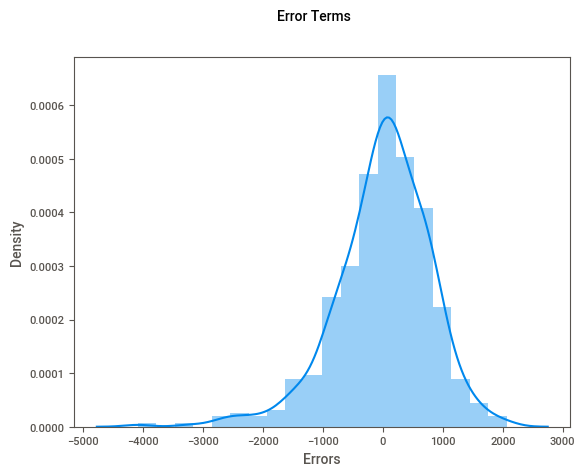

In [903]:
y_train_pred = lr.predict(X_train_sm)
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot(res, bins=20)
fig.suptitle('Error Terms', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)
plt.show()
# Curve appears to be normal

### Homoscedasticity - check variance across the regression line.

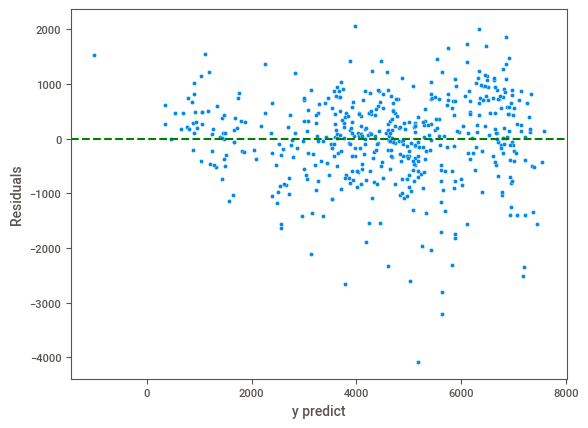

In [904]:
sns.scatterplot(x= y_train_pred, y=res)
plt.xlabel('y predict')
plt.ylabel('Residuals')
plt.axhline(y=0, color='green', linestyle='--')
plt.show()

# Equal variance across the regression line observed

#### Autocorrelation of residuals

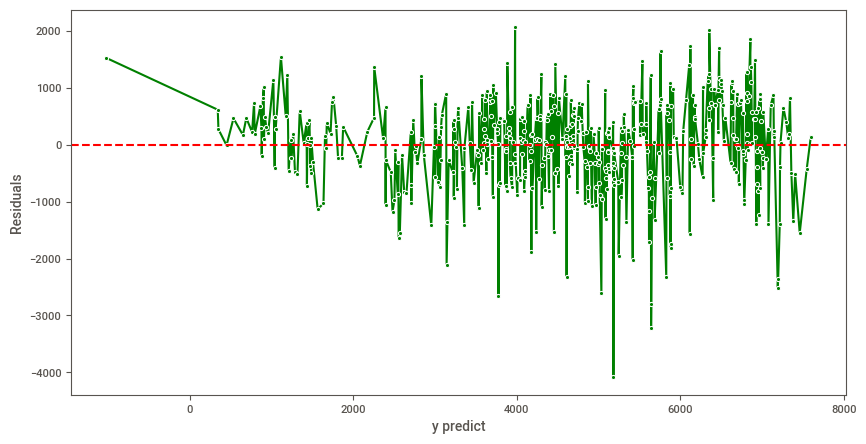

In [905]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=y_train_pred, y=res, marker='o', color='green')
plt.xlabel('y predict')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# The error terms are not forming any pattern and hence the model is good.

## Make Predictions

In [906]:

df_test[independent_num_cols] = scaler.transform(df_test[independent_num_cols])
df_test.describe()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,light_snow,mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,0.501760,0.629546,0.435511,4403.136986,0.283105,0.237443,0.228311,...,0.073059,0.063927,0.132420,0.127854,0.123288,0.132420,0.168950,0.141553,0.027397,0.315068
std,0.498836,0.176306,0.451539,0.215759,0.152584,0.212750,1930.694541,0.451539,0.426491,0.420705,...,0.260830,0.245183,0.339723,0.334692,0.329520,0.339723,0.375566,0.349389,0.163612,0.465607
min,0.000000,0.000000,0.000000,0.051010,0.193646,0.060760,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.314694,0.520479,0.281156,2798.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.496145,0.608416,0.416900,4334.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.685028,0.735901,0.534288,5766.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.939531,1.002146,1.214955,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [907]:
X_train_rfe.columns

Index(['yr', 'atemp', 'windspeed', 'spring', 'winter', 'dec', 'jul', 'mar',
       'nov', 'sept', 'light_snow', 'mist_cloudy'],
      dtype='object')

### Compare test and train data

In [908]:
y_test = df_test.pop('cnt')
X_test= df_test[X_train_rfe.columns]
X_test_sm = sm.add_constant(X_test)
y_test_predict = lr.predict(X_test_sm)
r2_score(y_test, y_test_predict)

# Train data Adj. R-squared:	0.828
# Test data Adj. R-squared:	0.813
# Model can be used to predict the bike demand.

0.8133603343823078